In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import tensorboard

In [2]:
mnist = keras.datasets.mnist.load_data()

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = mnist
# X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full)

In [4]:
X_val, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_val, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

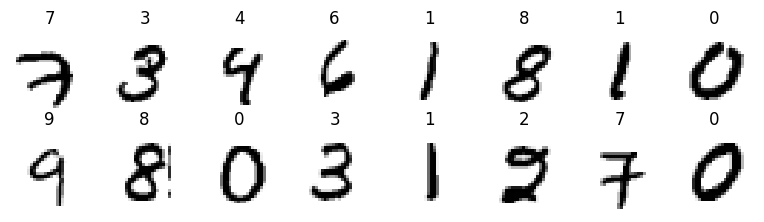

In [5]:
def plot_mnist(n_rows, n_cols, sample):
    plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(sample[index],cmap="binary", interpolation="nearest")
            plt.axis("off")
            plt.title(y_train[index],fontsize=12)
plot_mnist(2, 8, X_train)
plt.show()

In [6]:
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        print(self.model.optimizer.learning_rate)
        self.rates.append(keras.backend.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        keras.backend.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [7]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [10]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_val, y_val),
                    callbacks=[expon_lr])

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>
   1/1719 [..............................] - ETA: 8:25 - loss: 2.4268 - accuracy: 0.0312<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0010050001>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001010025>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0010150751>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0010201505>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0010252512>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0010303775>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0010355293>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001040707>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0010459105>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.00105114>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0010563957>
<tf.Variable 'learning_

 113/1719 [>.............................] - ETA: 4s - loss: 2.2818 - accuracy: 0.1817<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0017569719>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0017657568>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0017745856>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0017834585>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0017923758>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0018013377>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0018103444>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0018193962>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0018284931>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0018376355>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0018468237>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0018560578>
<tf.Variable '

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0029367632>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.002951447>
 218/1719 [==>...........................] - ETA: 4s - loss: 2.2101 - accuracy: 0.2384<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0029662042>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0029810353>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0029959404>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.00301092>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0030259746>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0030411044>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.00305631>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0030715915>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0030869495>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0031023843>
<tf.Variable 'learn

 322/1719 [====>.........................] - ETA: 4s - loss: 2.1206 - accuracy: 0.3066<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.004982775>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005007689>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0050327275>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005057891>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0050831805>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0051085963>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005134139>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0051598097>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0051856088>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005211537>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0052375942>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.005263782>
<tf.Variable 'learni

 430/1719 [======>.......................] - ETA: 3s - loss: 1.9798 - accuracy: 0.3928<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.008538971>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.008581665>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.008624573>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.008667696>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.008711034>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.00875459>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.008798363>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.008842355>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.008886566>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.008930999>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.008975654>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0090205325>
<tf.Variable 'learning_rat

 539/1719 [========>.....................] - ETA: 3s - loss: 1.8043 - accuracy: 0.4666<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.014706397>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.014779929>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.014853829>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.014928098>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.015002739>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.015077752>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.015153141>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.015228907>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.015305051>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.015381576>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.015458483>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.015535776>
<tf.Variable 'learning_rat

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.025202334>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.025328346>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.025454987>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.025582261>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.025710173>
 652/1719 [==========>...................] - ETA: 3s - loss: 1.6164 - accuracy: 0.5288<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.025838723>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.025967916>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.026097756>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.026228245>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.026359387>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.026491184>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.02662364>
<tf.Variable 'learning_rate

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.043622147>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.04384026>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.04405946>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.044279758>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.044501156>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.04472366>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.044947278>
 764/1719 [============>.................] - ETA: 2s - loss: 1.4522 - accuracy: 0.5782<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.045172013>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.045397874>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.045624863>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.04585299>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.046082254>
<tf.Variable 'learning_rate:0'

 880/1719 [==============>...............] - ETA: 2s - loss: 1.3186 - accuracy: 0.6161<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.080562405>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.08096521>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.08137004>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.08177689>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.08218577>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.0825967>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.08300968>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.08342473>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.08384185>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.08426106>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.08468237>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.08510578>
<tf.Variable 'learning_rate:0' shape=(

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.14154585>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.14225358>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.14296484>
 996/1719 [================>.............] - ETA: 2s - loss: 1.2102 - accuracy: 0.6469<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.14367966>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.14439806>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.14512005>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.14584565>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.14657488>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.14730775>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.14804429>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.1487845>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.14952843>
<tf.Variable 'learning_rate:0' shape=()

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.25118515>
1109/1719 [==================>...........] - ETA: 1s - loss: 1.1299 - accuracy: 0.6701<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.25244108>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.2537033>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.2549718>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.25624666>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.2575279>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.25881553>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.2601096>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.26141015>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.2627172>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.26403078>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.26535094>
<tf.Variable 'learning_rate:0' shape=() dty

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.45246926>
1227/1719 [====================>.........] - ETA: 1s - loss: 1.0636 - accuracy: 0.6891<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.4547316>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.45700526>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.4592903>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.46158674>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.46389467>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.46621415>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.46854523>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.47088796>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.4732424>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.47560862>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.47798666>
<tf.Variable 'learning_rate:0' shape=() d

1347/1719 [======================>.......] - ETA: 1s - loss: 1.0167 - accuracy: 0.7021<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.82733667>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.83147335>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.8356307>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.8398089>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.8440079>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.8482279>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.852469>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.85673136>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.861015>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.8653201>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.86964667>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.8739949>
<tf.Variable 'learning_rate:0' shape=() dtype=fl

1467/1719 [========================>.....] - ETA: 0s - loss: 2325236145045361098452107264.0000 - accuracy: 0.6691<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.505252>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.5127783>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.5203421>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.5279438>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.5355836>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.5432615>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.5509778>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.5587327>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.5665264>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.574359>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.5822308>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=1.590142>
<tf.Variable 'learning_rat

1589/1719 [==========================>...] - ETA: 0s - loss: nan - accuracy: 0.6260<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=2.7661047>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=2.7799351>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=2.7938347>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=2.8078039>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=2.821843>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=2.835952>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=2.8501318>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=2.8643825>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=2.8787043>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=2.8930979>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=2.9075634>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=2.9221013>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, 

1708/1719 [============================>.] - ETA: 0s - loss: nan - accuracy: 0.5896<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=5.0076003>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=5.032638>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=5.0578012>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=5.0830903>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=5.1085057>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=5.1340485>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=5.1597185>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=5.1855173>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=5.211445>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=5.237502>
<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=5.2636895>
1719/1719 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.5867 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

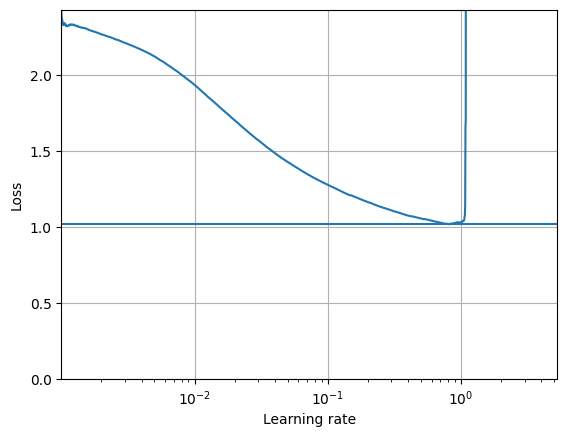

In [11]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [12]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(learning_rate=3e-1),
             metrics=["accuracy"])

In [15]:
run_index = 1
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))

In [16]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                   validation_data=(X_val, y_val),
                   callbacks=[early_stopping_cb, checkpoint_cb, tensorboard])

Epoch 1/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2319 - accuracy: 0.9276 - val_loss: 0.1076 - val_accuracy: 0.9684
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0940 - accuracy: 0.9706 - val_loss: 0.0938 - val_accuracy: 0.9722
Epoch 3/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0635 - accuracy: 0.9796 - val_loss: 0.0763 - val_accuracy: 0.9790
Epoch 4/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0492 - accuracy: 0.9839 - val_loss: 0.0845 - val_accuracy: 0.9774
Epoch 5/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0343 - accuracy: 0.9886 - val_loss: 0.0762 - val_accuracy: 0.9810
Epoch 6/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.0787 - val_accuracy: 0.9818
Epoch 7/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0226 - accuracy: 0.9924 - val_loss: 0.0879 - val_ac

In [17]:
model = keras.models.load_model("my_mnist_model.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0842 - accuracy: 0.9782


[0.08424144238233566, 0.9782000184059143]

In [18]:
# %load_ext tensorboard
# %tensorboard --logdir=./my_mnist_logs --port=6006